In [1]:
#real world
#raw data(csv, json, databases,  etc)
#read data
#clean data
#feature engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
#challanges -1
#   1. get all NaN values from DF
#   2. Get datatypes of features & its overview
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
#get all columns with some missing values so that we can deal with them
features_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
features_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
df.rate.isnull().sum()/len(df)*100  

15.033741322969234

In [10]:
for feature in features_na:
    print("{} has {}% missing values".format(feature,np.round(df[feature].isnull().sum()/len(df)*100 ,2)))

rate has 15.03% missing values
phone has 2.34% missing values
location has 0.04% missing values
rest_type has 0.44% missing values
dish_liked has 54.29% missing values
cuisines has 0.09% missing values
approx_cost(for two people) has 0.67% missing values


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [12]:
#challanges -2
#   1. perform data cleaning on approx cost feature
#   2. clean rate_num column

In [13]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [14]:
df[df['approx_cost(for two people)'].isnull()]


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [15]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
### using lambda function to replace special characters in approx_cost(for two people) column
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [17]:
#replace special character using custom function
def removeComma(x):
    return x.replace(',','')


In [18]:
df['approx_cost(for two people)'].astype(str).apply(removeComma)

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [19]:
df['approx_cost(for two people)'].unique() #check if our previous logic worked successfully

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [20]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float) #converting dtype to float
df['approx_cost(for two people)'].dtype #check new dtype

dtype('float64')

In [21]:
df['rate']=df['rate'].astype(str).apply(lambda x: x.split('/')[0]) #removing / from rate feature

In [22]:
#even after this we have - and NEW keyword in our data and that needs to be removed
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)

In [23]:
df['rate']=df['rate'].astype(float)
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4,
       2.2, 2.3, 4.8, 4.9, 2.1, 2. , 1.8])

<AxesSubplot:>

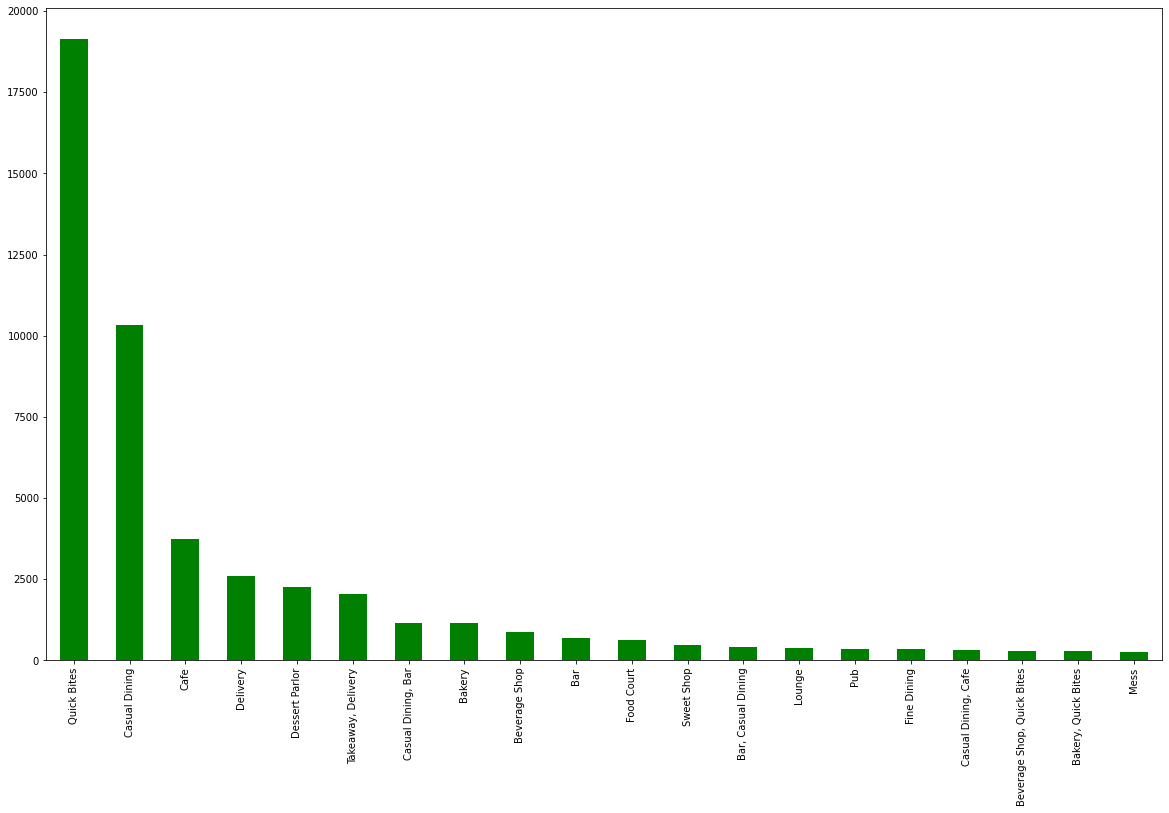

In [24]:
#challange 3-
#   How many types of restaurants we have?
plt.figure(figsize=(20,12))
df.rest_type.value_counts().nlargest(20).plot.bar(color='g')

In [25]:
def mark(x):
    if x in ('Quick Bites','Casual Dining'):
        return  'Quick Bites + Casual Dining'
    else:
        return 'others'

In [26]:
df['top_types']=df['rest_type'].apply(mark)

In [27]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),top_types
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites + Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites + Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites + Casual Dining


In [28]:
import plotly.express as px

In [29]:
fig=px.pie(df,
names=df['top_types'].value_counts().index,
values=df['top_types'].value_counts().values)
fig.show()

In [30]:
#challange 4 
#a) create a df with cost,votes & rating of each restaurants
#b) restaurants overview analysis
#to solve this challange we need to group our current df by restaurants
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_types'],
      dtype='object')

In [31]:
rest = df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest.head()

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [32]:
rest.columns=['name','totalVotes','totalUnities','averageApproxCost','meanRating']
rest.head()

,name,totalVotes,totalUnities,averageApproxCost,meanRating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [33]:
rest['votesPerUnit']=rest['totalVotes']/rest['totalUnities']
rest.head()

,name,totalVotes,totalUnities,averageApproxCost,meanRating,votesPerUnit
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [34]:
popular=rest.sort_values(by=['totalUnities'],ascending=False)
print(popular.head())
print(popular.shape)
print(popular.name.nunique())


                   name  totalVotes  totalUnities  averageApproxCost  \
1320    Cafe Coffee Day        3089            96         844.791667   
5549             Onesta      347520            85         600.000000   
3788          Just Bake        2898            73         400.000000   
2446  Empire Restaurant      229808            71         685.211268   
2577  Five Star Chicken        3134            70         257.857143   

      meanRating  votesPerUnit  
1320    3.147191     32.177083  
5549    4.410588   4088.470588  
3788    3.355882     39.698630  
2446    3.916901   3236.732394  
2577    3.425000     44.771429  
(8792, 6)
8792


In [35]:
#restaurants overview analysis
# 1. avg votes rec by rest
# top 5 most voted res
# top 5 least voted rest

In [36]:
popular.sort_values(by='totalVotes',ascending=False).query('totalVotes>0').head(5)

,name,totalVotes,totalUnities,averageApproxCost,meanRating,votesPerUnit
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
8269,Truffles,301059,43,900.000000,4.595349,7001.372093
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
3054,Hammered,180602,47,1272.340426,4.329787,3842.595745
7751,The Black Pearl,172122,18,1427.777778,4.727778,9562.333333


Text(0.5, 1.0, 'Top 5 least voted restaurants')

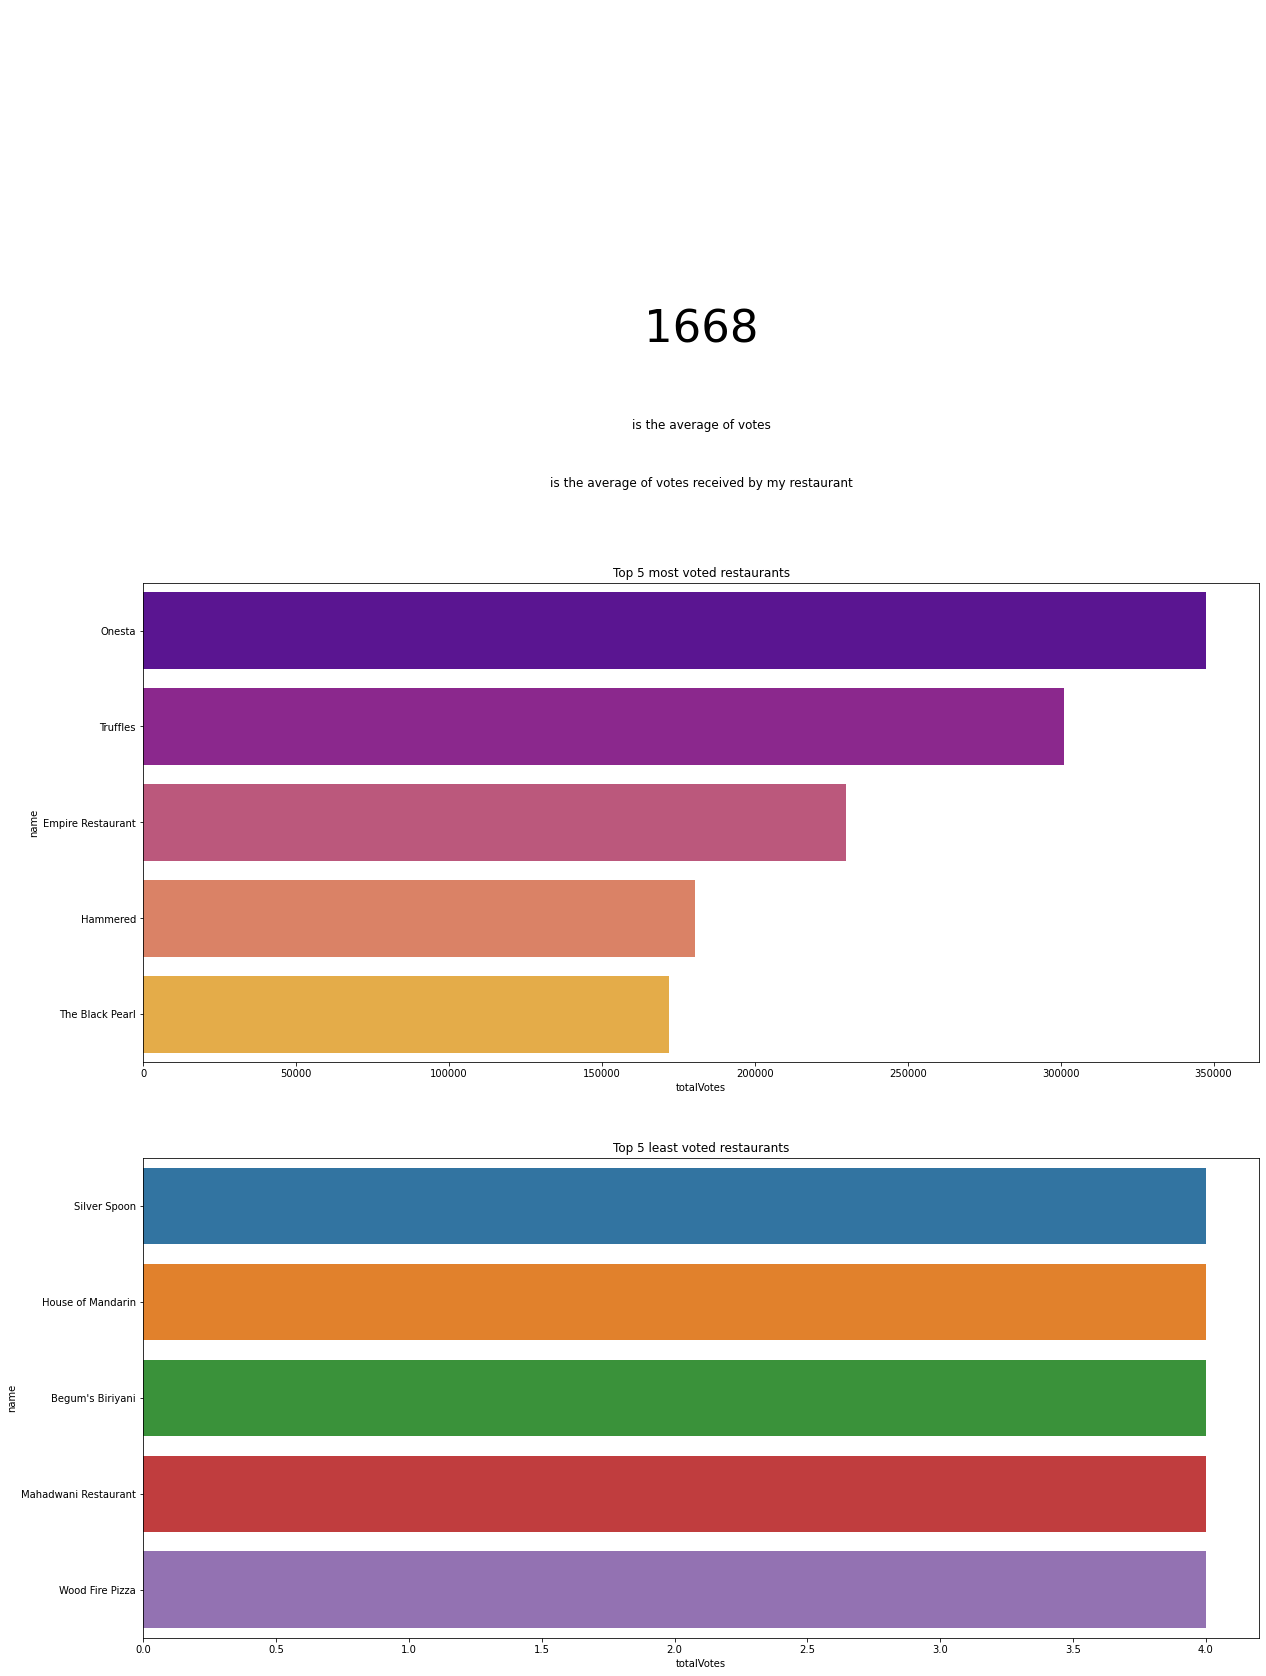

In [37]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.5,0.3,int(popular['totalVotes'].mean()),fontsize=45,ha='center')
ax1.text(0.5,0.12,'is the average of votes',fontsize=12,ha='center')
ax1.text(0.5,0.0,'is the average of votes received by my restaurant',fontsize=12,ha='center')
ax1.axis('off')
sns.barplot(x='totalVotes',y='name',data=popular.sort_values(by='totalVotes',ascending=False).query('totalVotes>0').head(5),ax=ax2,palette='plasma')
ax2.set_title('Top 5 most voted restaurants')
sns.barplot(x='totalVotes',y='name',data=popular.sort_values(by='totalVotes',ascending=False).query('totalVotes>0').tail(5),ax=ax3)
ax3.set_title('Top 5 least voted restaurants')


In [38]:
#challange 5
# analysing most expensive and cheapest restaurants
# no of restaurants offer table booking service and online delivery
# finding best budget restaurant in any location
popular.columns

Index(['name', 'totalVotes', 'totalUnities', 'averageApproxCost', 'meanRating',
       'votesPerUnit'],
      dtype='object')

Text(0.5, 1.0, 'Top 5 cheapest restaurants')

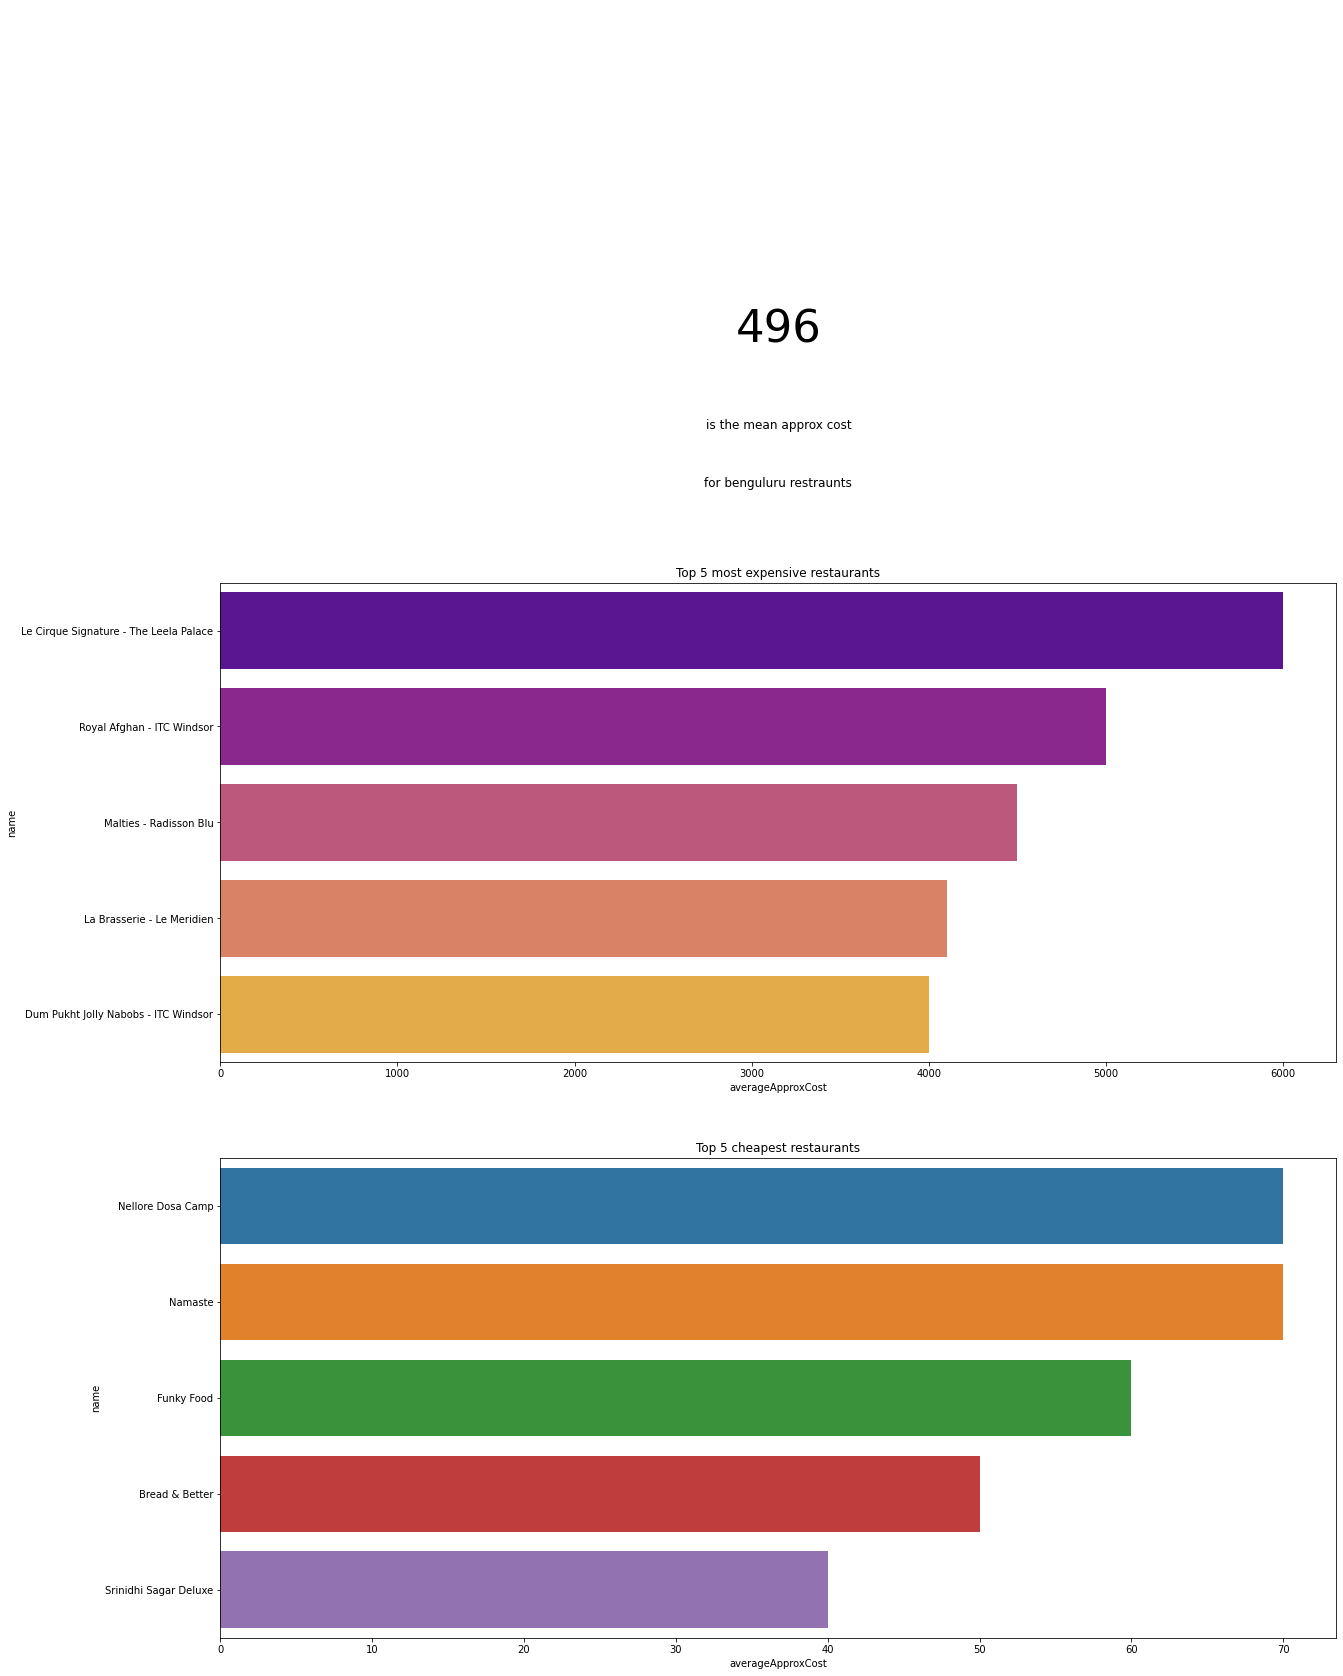

In [39]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(20,30))
ax1.text(0.5,0.3,int(popular['averageApproxCost'].mean()),fontsize=45,ha='center')
ax1.text(0.5,0.12,'is the mean approx cost',fontsize=12,ha='center')
ax1.text(0.5,0.0,'for benguluru restraunts',fontsize=12,ha='center')
ax1.axis('off')
sns.barplot(x='averageApproxCost',y='name',data=popular.sort_values(by='averageApproxCost',ascending=False).query('averageApproxCost>0').head(5),ax=ax2,palette='plasma')
ax2.set_title('Top 5 most expensive restaurants')
sns.barplot(x='averageApproxCost',y='name',data=popular.sort_values(by='averageApproxCost',ascending=False).query('averageApproxCost>0').tail(5),ax=ax3)
ax3.set_title('Top 5 cheapest restaurants')


In [40]:
x=df.book_table.value_counts()
labels=['not book','book']

In [41]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [42]:
trace = go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='percent')
iplot([trace])

In [43]:
x=df.online_order.value_counts()
labels=['accepted','not accepted']
values=x.values
fig=px.pie(df,names=labels,values=values,title='Pie Chart')
fig.show()

In [44]:
#challange 6
# finding best budget restaurant in any location
# how to extract latitude and longitude of any place

In [45]:
budgetDf=df[(df['approx_cost(for two people)']<400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')]
print(budgetDf.head())
print(budgetDf['name'].unique())

                                                    url  \
934   https://www.zomato.com/bangalore/swadista-aaha...   
940   https://www.zomato.com/bangalore/swad-punjab-d...   
942   https://www.zomato.com/bangalore/roti-wala-btm...   
954   https://www.zomato.com/bangalore/litti-twist-b...   
1055  https://www.zomato.com/bangalore/the-shawarma-...   

                                                address               name  \
934      947, 16th Main Road, 2nd Stage, BTM, Bangalore     Swadista Aahar   
940   324, 23rd Main, 3rd Cross, 2nd Stage, BTM, Ban...     Swad Punjab Da   
942   688, 7th Main, 10th Cross Main Road, 2nd Stage...          Roti Wala   
954   No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...        Litti Twist   
1055  688, Opposite IWWA Party Hall, 7th Main, BTM, ...  The Shawarma Shop   

     online_order book_table  rate  votes                               phone  \
934           Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
940           

In [46]:
def getbudgetRestraunts(data,location,restaurantType):
    filter =  ((data['location']==location) &(data['rest_type']==restaurantType))
    budget=data[filter]
    return (budget['name'].unique())
    # filter=data['location']==location
    # if restaurantType is not None:
    #     filter = filter & data['rest_type']==restaurantType
    # if costMin is not None:
    #     filter = filter & data['approx_cost(for two people)']>=costMin
    # if costMax is not None:
    #     filter = filter & data['approx_cost(for two people)']<=costMax
    # if ratingMin is not None:
    #     filter = filter & data['rate']>=ratingMin
    # if ratingMax is not None:
    #     filter = filter & data['rate']<=ratingMax
    # if filter is not None:
    #     budgetDf=data.where(filter,inplace=True)
    #     return budgetDf
    # return data
   

In [47]:
budgetDf=getbudgetRestraunts(df,'BTM','Quick Bites')
budgetDf
    # df[(df['approx_cost(for two people)']<400) & (df['location']=='BTM') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')]

array(['Hiyar Majhe Kolkata', 'Sri Lakshmi Dhaba', 'Swadista Aahar',
       'YummRajj', 'Swad Punjab Da', 'Roti Wala', 'Midnight Mania',
       'Apna Punjab', 'Paratha Junction', 'Kalingas', 'Litti Twist',
       'Poha House', 'Bathinda Tandoor', 'Chicken Magic',
       'New Mahesh Friends Food Corner', 'Mahesh Friends Food Center',
       'Sher-E-Punjab', 'Aramane Donne Biriyani', 'Biriyani Bhatti',
       'RSS Donne Biryani', 'Veruthe Oru Thattukada', 'The Shawarma Shop',
       'Pathaan Sir', 'Hari Super Sandwich', 'Chokha Chowka', 'Gorbandh',
       "Daniyal's", 'Yum In My Tum', "Magix's Parattha Roll",
       'Masale Daan', "Ahmed's Little Hut", 'The Bong Palate',
       'Crunch Pizzas', 'Manchu Cafe', 'Nanna Munna Paratha House',
       'Totus', "Dev's Gugababa", 'Delhi Biryani Cafe', 'Tarbouche',
       'Appana Restaurant', 'RK Fresh Food', 'The Food Cottage', 'Perch',
       'Taste Of Kolkata', 'China Town 07', 'Biryani Magic',
       'Smoke Oil Salt', "Rayaan's BBQ", 'Miss Mom

In [48]:
#geographical analysis for budgeted restraunts
#for this lat and longs required

In [49]:
from geopy.geocoders import Nominatim

In [50]:
geolocator=Nominatim(user_agent='app')

In [51]:
data=budgetDf[1]
data

'Sri Lakshmi Dhaba'

In [52]:
geoLoc=geolocator.geocode(data)

In [53]:
geoLoc.latitude,geoLoc.longitude

(13.3307812, 76.2435407)

In [54]:
#challange 7 
#how to extract latitude and longitude of banglore location
#perform spatial analysis where most of my restaurants are situated
df.location.nunique()

93

In [55]:
locationDf =pd.DataFrame(df.location.unique(),columns=['Name'])
latlist=[]
longlist=[]
for name in locationDf['Name']:
    geoLoc=geolocator.geocode(name)
    if geoLoc is not None:
        latlist.append(geoLoc.latitude)
        longlist.append(geoLoc.longitude)
    else:
        latlist.append(np.nan)
        longlist.append(np.nan)
locationDf['Latitude']=latlist
locationDf['Longitude']=longlist


In [56]:
rest_locations=df['location'].value_counts().reset_index()


In [57]:
rest_locations.columns=['Name','Count']

In [58]:
rest_locations

,Name,Count
0,BTM,5124
1,HSR,2523
2,Koramangala 5th Block,2504
3,JP Nagar,2235
4,Whitefield,2144
...,...,...
88,West Bangalore,6
89,Yelahanka,6
90,Jakkur,3
91,Rajarajeshwari Nagar,2


In [59]:
rest_locations=rest_locations.merge(locationDf,on='Name').dropna()

In [60]:
rest_locations

,Name,Count,Latitude,Longitude
0,BTM,5124,45.954851,-112.496595
1,HSR,2523,18.147500,41.538889
2,Koramangala 5th Block,2504,13.005409,74.794607
3,JP Nagar,2235,12.265594,76.646540
4,Whitefield,2144,44.373058,-71.611858
...,...,...,...,...
88,West Bangalore,6,13.001129,77.632562
89,Yelahanka,6,13.100698,77.596345
90,Jakkur,3,13.078474,77.606894
91,Rajarajeshwari Nagar,2,12.927441,77.515522


In [61]:
import folium
from folium.plugins import HeatMap

In [62]:
basemap=folium.Map(location=[28.7041,77.1025])
basemap

In [63]:
HeatMap(data=rest_locations[['Latitude','Longitude','Count']]).add_to(basemap)

In [64]:
basemap

In [65]:
#challange 8
#Analysing Customer Preferences
#Analysing reviews of particular restaurants


In [66]:
#will use world cloud for challange 8
#world cloud - biggger the word means more likes

In [67]:
from wordcloud import WordCloud, STOPWORDS

In [68]:
data=df[df['rest_type']=='Quick Bites']
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),top_types
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites + Casual Dining
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari,Quick Bites + Casual Dining
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari,Quick Bites + Casual Dining
36,https://www.zomato.com/bangalore/fast-and-fres...,"32, 7th Main Road, Dwaraka Nagar,Near PES Coll...",Fast And Fresh,Yes,No,2.8,91,+91 9742974232,Banashankari,Quick Bites,NaN,"North Indian, Chinese, Fast Food",400.0,"[('Rated 1.0', 'RATED\n Half baked rice in a ...",[],Delivery,Banashankari,Quick Bites + Casual Dining
39,https://www.zomato.com/bangalore/maruthi-davan...,"556/A, Water Tank Road, 3rd Stage, Banashankar...",Maruthi Davangere Benne Dosa,Yes,No,4.0,17,+91 9019563485,Banashankari,Quick Bites,NaN,South Indian,150.0,"[('Rated 5.0', ""RATED\n This restaurant serve...","['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...",Delivery,Banashankari,Quick Bites + Casual Dining


In [69]:
dishes= ''
dish_likedsplitted = data['dish_liked'].dropna().str.split()
dish_likedsplitted=dish_likedsplitted.apply(lambda x:  [i.lower() for i in x])
ld=[]
dish_likedsplitted.apply(lambda x: [ld.append(i) for i in x])
dishes=dishes+' '.join(ld)+' '
dishes

In [70]:
stopwords=set(STOPWORDS)

In [71]:
wordCloud=WordCloud(stopwords=stopwords,width=1500,height=1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

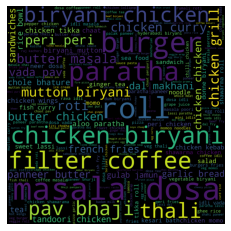

In [72]:
plt.imshow(wordCloud)
plt.axis('off')